# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf

# **Import dataset**

In [2]:
df=pd.read_csv('/content/winequalityN.csv')
df.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [3]:
df['type'].unique()

array(['white', 'red'], dtype=object)

# **Find NULL values**

In [4]:
df.isnull().sum()

,0
type,0
fixed acidity,10
volatile acidity,8
citric acid,3
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


# **Data Cleaning**


In [6]:
df["fixed acidity"].fillna(df["fixed acidity"].mean(),inplace=True)
df["volatile acidity"].fillna(df["volatile acidity"].mean(),inplace=True)
df["citric acid"].fillna(df["citric acid"].mean(),inplace=True)
df["residual sugar"].fillna(df["residual sugar"].mean(),inplace=True)
df["chlorides"].fillna(df["chlorides"].mean(),inplace=True)
df["pH"].fillna(df["pH"].mean(),inplace=True)
df["sulphates"].fillna(df["sulphates"].mean(),inplace=True)


In [7]:
df.isnull().sum()

,0
type,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0


In [8]:
df['type'] = df['type'].map({'white': 0, 'red': 1})

In [9]:
df['type'].unique()

array([0, 1])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


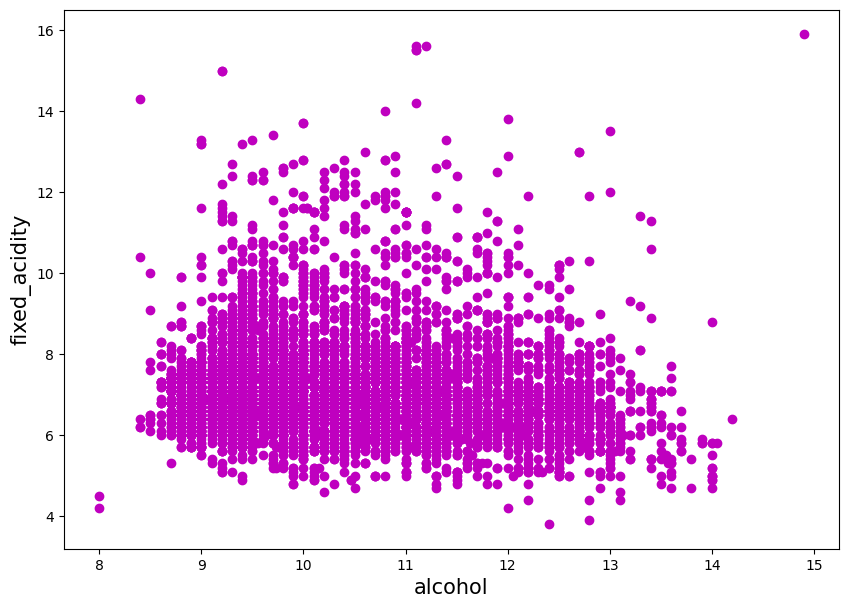

In [11]:
plt.figure(figsize=(10,7))
plt.scatter(x="alcohol",y="fixed acidity",data =df,marker= 'o',c="m")
plt.xlabel("alcohol",fontsize=15)
plt.ylabel("fixed_acidity",fontsize=15)
plt.show()

[]

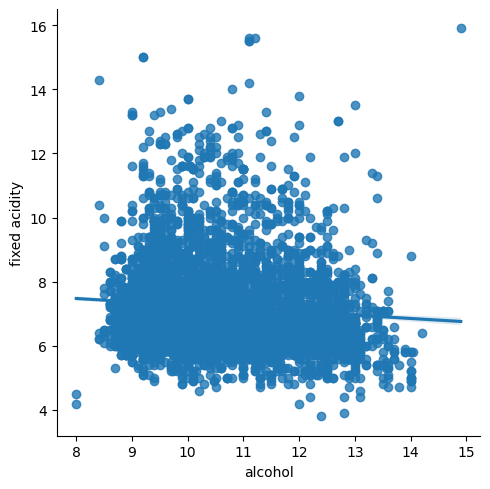

In [12]:
sns.lmplot(x="alcohol",y="fixed acidity",data=df)
plt.plot()


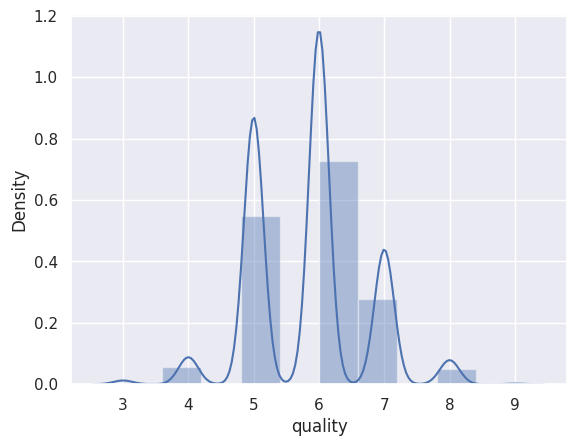

In [13]:
sns.set()
sns.distplot(df["quality"],bins=10)
plt.show()


In [14]:
# split the dataset into independent and dependent features
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [15]:
X

array([[ 0.   ,  7.   ,  0.27 , ...,  3.   ,  0.45 ,  8.8  ],
       [ 0.   ,  6.3  ,  0.3  , ...,  3.3  ,  0.49 ,  9.5  ],
       [ 0.   ,  8.1  ,  0.28 , ...,  3.26 ,  0.44 , 10.1  ],
       ...,
       [ 1.   ,  6.3  ,  0.51 , ...,  3.42 ,  0.75 , 11.   ],
       [ 1.   ,  5.9  ,  0.645, ...,  3.57 ,  0.71 , 10.2  ],
       [ 1.   ,  6.   ,  0.31 , ...,  3.39 ,  0.66 , 11.   ]])

Encoding the Categorical data
using One hot encoding

Spit the data in training and testing

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4872, 12), (1625, 12), (4872,), (1625,))

Feature scaling

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [19]:
X_test_sc

array([[-0.57577022, -0.17146177, -0.54622916, ..., -0.36612842,
        -0.35543507,  1.1719876 ],
       [-0.57577022,  0.28695474, -1.20831142, ..., -0.92623195,
        -0.8830194 ,  0.25267266],
       [-0.57577022, -0.78268378, -1.14812212, ..., -0.61506332,
        -1.01491548, -1.16808679],
       ...,
       [-0.57577022,  1.50939876, -0.66660775, ..., -1.73527039,
        -1.5424998 , -0.08162368],
       [-0.57577022,  0.28695474, -0.66660775, ..., -1.17516686,
        -0.61922723, -1.08451271],
       [ 1.73680397,  0.59256574,  1.44001761, ...,  0.00727394,
         0.04025317, -0.91736454]])

Logistic Regration model

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [21]:
models = {'Log_Reg': LogisticRegression(),
          'SVC': SVC(),
          'RF': RandomForestClassifier(),
          'KNN': KNeighborsClassifier(),
          'Naive Bayes': GaussianNB(),
          'Decision Tree': DecisionTreeClassifier()
          }
for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the training set performance
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train,y_train_pred,average='weighted')
    train_recall = recall_score(y_train, y_train_pred,average='weighted')
    train_f1 = f1_score(y_train, y_train_pred,average='weighted')
    train_confu_matrix = confusion_matrix(y_train, y_train_pred)

    # Evaluate the test set performance
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred,average='weighted')
    test_recall = recall_score(y_test, y_test_pred,average='weighted')
    test_f1 = f1_score(y_test, y_test_pred,average='weighted')
    test_confu_matrix = confusion_matrix(y_test, y_test_pred)

    print(list(models.keys())[i])

    print('Model performance for training set')
    print(' - Train Accuracy: {:.4f}'.format(train_accuracy))
    print(' - Train Precision: {:.4f}'.format(train_precision))
    print(' - Train Recall: {:.4f}'.format(train_recall))
    print(' - Train F1 Score: {:.4f}'.format(train_f1))



    print("----------------------")

    print('Model performance for testing set')
    print(' - Test Accuracy: {:.4f}'.format(test_accuracy))
    print(' - Test Precision: {:.4f}'.format(test_precision))
    print(' - Test Recall: {:.4f}'.format(test_recall))
    print(' - Test F1 Score: {:.4f}'.format(test_f1))


    print('--'*30)
    print('\n')

Log_Reg
Model performance for training set
 - Train Accuracy: 0.4709
 - Train Precision: 0.4345
 - Train Recall: 0.4709
 - Train F1 Score: 0.4025
----------------------
Model performance for testing set
 - Test Accuracy: 0.4812
 - Test Precision: 0.4162
 - Test Recall: 0.4812
 - Test F1 Score: 0.4145
------------------------------------------------------------


SVC
Model performance for training set
 - Train Accuracy: 0.4419
 - Train Precision: 0.3510
 - Train Recall: 0.4419
 - Train F1 Score: 0.3269
----------------------
Model performance for testing set
 - Test Accuracy: 0.4474
 - Test Precision: 0.3385
 - Test Recall: 0.4474
 - Test F1 Score: 0.3337
------------------------------------------------------------


RF
Model performance for training set
 - Train Accuracy: 1.0000
 - Train Precision: 1.0000
 - Train Recall: 1.0000
 - Train F1 Score: 1.0000
----------------------
Model performance for testing set
 - Test Accuracy: 0.6880
 - Test Precision: 0.6899
 - Test Recall: 0.6880
 -

In [22]:
import pickle
pickle.dump(sc,open('wine_quality_scalar.pkl', 'wb' ))

ANN Model

Using unscaled data

In [23]:
binary_ann_model = tf.keras.Sequential()

In [24]:
binary_ann_model.add(tf.keras.layers.Dense(units=150, activation='relu', input_shape=(X_train.shape[1],)))
binary_ann_model.add(tf.keras.layers.Dense(units=100, activation='relu'))
binary_ann_model.add(tf.keras.layers.Dense(units=80, activation='relu'))
binary_ann_model.add(tf.keras.layers.Dense(units=60, activation='relu'))
binary_ann_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [25]:
binary_ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
binary_ann_model.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: -186716.9844
Epoch 2/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -63681624.0000
Epoch 3/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0000e+00 - loss: -1568112000.0000
Epoch 4/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0000e+00 - loss: -11743430656.0000
Epoch 5/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: -49089650688.0000
Epoch 6/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: -145841963008.0000
Epoch 7/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: -347853193216.0000
Epoch 8/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -718396719104.0000
Epoch 9/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: -1333997076480.0000
Epoch 10/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: -

In [27]:
y_pred_ann = binary_ann_model.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5)

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [28]:
acc_scocre = accuracy_score(y_test, y_pred_ann)
print(acc_scocre)

0.0


Using scaled data


In [29]:
binary_ann_model.add(tf.keras.layers.Dense(units=150, activation='relu', input_shape=(X_train_sc.shape[1],)))
binary_ann_model.add(tf.keras.layers.Dense(units=100, activation='relu'))
binary_ann_model.add(tf.keras.layers.Dense(units=80, activation='relu'))
binary_ann_model.add(tf.keras.layers.Dense(units=60, activation='relu'))
binary_ann_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [30]:
binary_ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
binary_ann_model.fit(X_train_sc, y_train, batch_size=32, epochs=100)

Epoch 1/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.0000e+00 - loss: -1036.1239
Epoch 2/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: -277487.0625
Epoch 3/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0000e+00 - loss: -6159512.0000
Epoch 4/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0000e+00 - loss: -44008432.0000
Epoch 5/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0000e+00 - loss: -178527088.0000
Epoch 6/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: -523031552.0000
Epoch 7/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: -1230242688.0000
Epoch 8/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: -2521287936.0000
Epoch 9/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: -4645935104.0000
Epoch 10/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: -7878285824.0000
Epoch 

In [32]:
y_pred_ann = binary_ann_model.predict(X_test_sc)
y_pred_ann = (y_pred_ann > 0.9)

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [33]:
acc_scocre = accuracy_score(y_test, y_pred_ann)
print(acc_scocre)

0.0


In [34]:
binary_ann_model.save('wine_quality_ann_model.h5')